# **🎯 Student Performance Analysis**
**Goal:** Understand how personal, social, and academic factors impact final grades.

---

## 🔄 Data Cleaning & Preprocessing

## 📊 Visual Insights

1. Parent Status vs Final Grades
2. Failures vs Grades
3. Study Time Impact
4. Internet Access
5. Family Relationship
6. Correlation Heatmap

In [28]:
# 📊 Student Performance Analysis (UCI Dataset)
# Goal: Analyze how personal, social, and familial factors influence academic grades

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()
df=pd.read_csv("student-mat.csv",sep=";") #upload the csv file down here!! :D

Saving student-mat.csv to student-mat (7).csv


Missing Values:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


/tmp/ipython-input-34-1988179486.py:29: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(
/tmp/ipython-input-34-1988179486.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-34-1988179486.py:75: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(


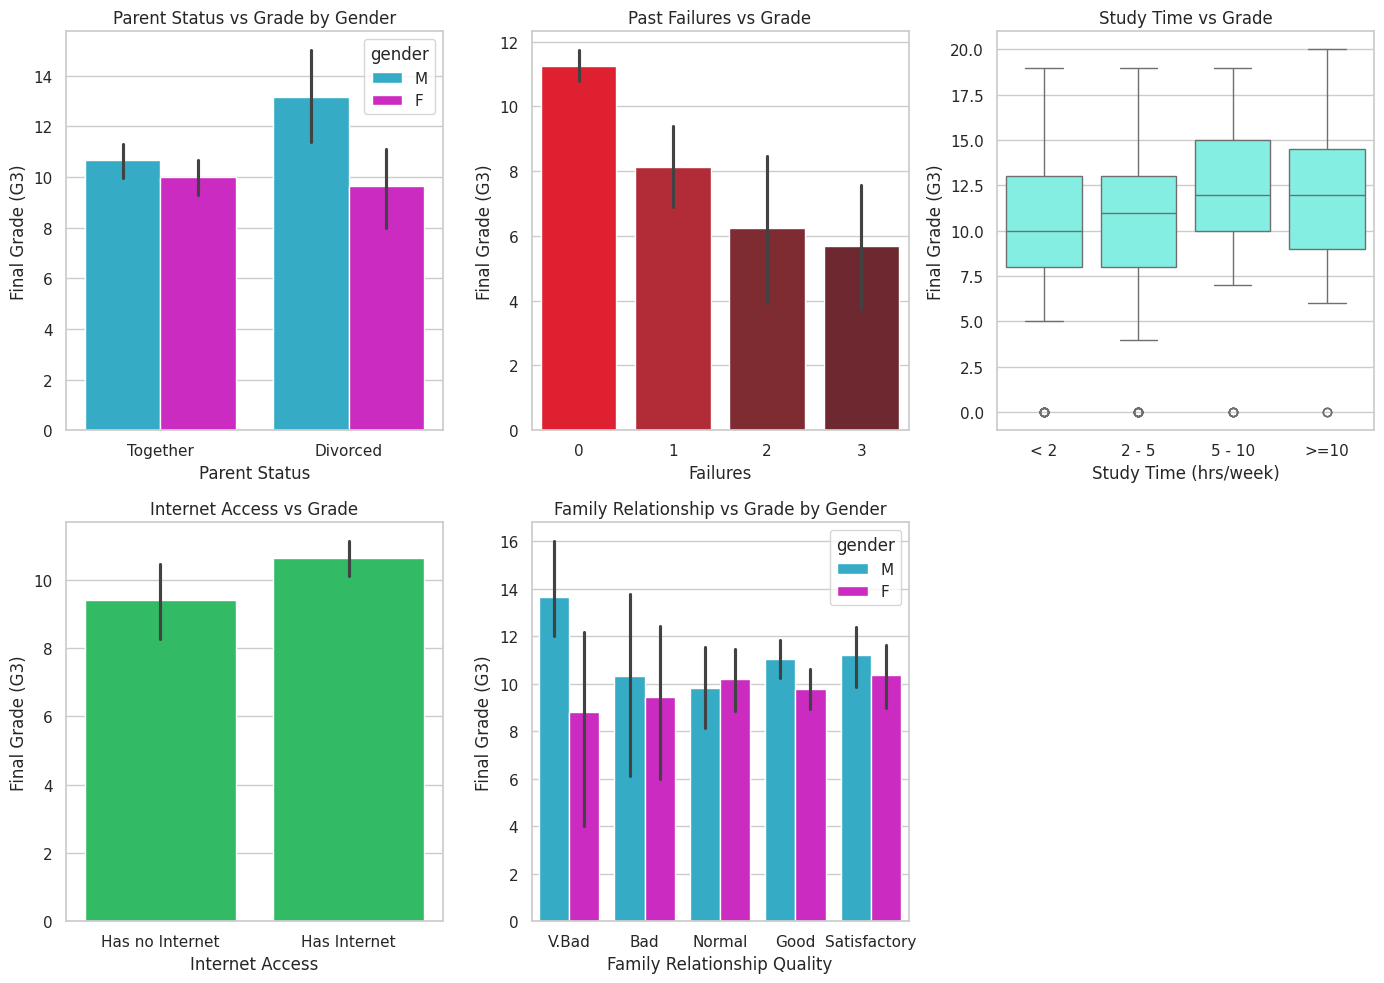

In [34]:

# 1. Load and clean data
df = pd.read_csv("student-mat.csv", sep=";")

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Rename and transform columns for readability
df["gender"] = df["sex"]
df["Pstatus"] = np.where(df["Pstatus"] == "T", "Together", "Divorced")
df["internet"] = df["internet"].map({"yes": "Has Internet", "no": "Has no Internet"})
df["famrel"] = df["famrel"].map({
    1: "V.Bad",
    2: "Bad",
    3: "Normal",
    4: "Good",
    5: "Satisfactory"
})
df["studytimestring"] = df["studytime"].map({1: "< 2", 2: "2 - 5", 3: "5 - 10", 4: ">=10"})
df["Drinks Alcohol"] = df["Dalc"]
df["Drinks Alcohol (weekends)"] = df["Walc"]

# 2. Create subplot grid
fig, axs = plt.subplots(2, 3, figsize=(14, 10))

# --- PARENT STATUS ---
axs[0, 0].set_title("Parent Status vs Grade by Gender")
axs[0, 0].set_xlabel("Parent Status")
axs[0, 0].set_ylabel("Final Grade (G3)")
sns.barplot(
    data=df,
    x="Pstatus",
    y="G3",
    hue="gender",
    ax=axs[0, 0],
    order=["Together", "Divorced"],
    hue_order=["M", "F"],
    palette=["#1dbade", "#e610d7", "#3b66a3", "#992391"]
)

# --- PAST FAILURES ---
axs[0, 1].set_title("Past Failures vs Grade")
axs[0, 1].set_xlabel("Failures")
axs[0, 1].set_ylabel("Final Grade (G3)")
sns.barplot(
    data=df,
    x="failures",
    y="G3",
    ax=axs[0, 1],
    palette=["#ff0015", "#c71625", "#8c1d27", "#781e25"]
)

# --- STUDY TIME ---
axs[0, 2].set_title("Study Time vs Grade")
axs[0, 2].set_xlabel("Study Time (hrs/week)")
axs[0, 2].set_ylabel("Final Grade (G3)")
sns.boxplot(
    data=df,
    x="studytimestring",
    y="G3",
    ax=axs[0, 2],
    order=["< 2", "2 - 5", "5 - 10", ">=10"],
    color="#73fff1"
)

# --- INTERNET ACCESS ---
axs[1, 0].set_title("Internet Access vs Grade")
axs[1, 0].set_xlabel("Internet Access")
axs[1, 0].set_ylabel("Final Grade (G3)")
sns.barplot(data=df, x="internet", y="G3", ax=axs[1, 0], color="#1bd15e")

# --- FAMILY RELATIONSHIP ---
axs[1, 1].set_title("Family Relationship vs Grade by Gender")
axs[1, 1].set_xlabel("Family Relationship Quality")
axs[1, 1].set_ylabel("Final Grade (G3)")
sns.barplot(
    data=df,
    x="famrel",
    y="G3",
    hue="gender",
    ax=axs[1, 1],
    order=["V.Bad", "Bad", "Normal", "Good", "Satisfactory"],
    hue_order=["M", "F"],
    palette=["#1dbade", "#e610d7"] * 5
)
fig.delaxes(axs[1, 2])

# Final layout
plt.tight_layout()
plt.show()

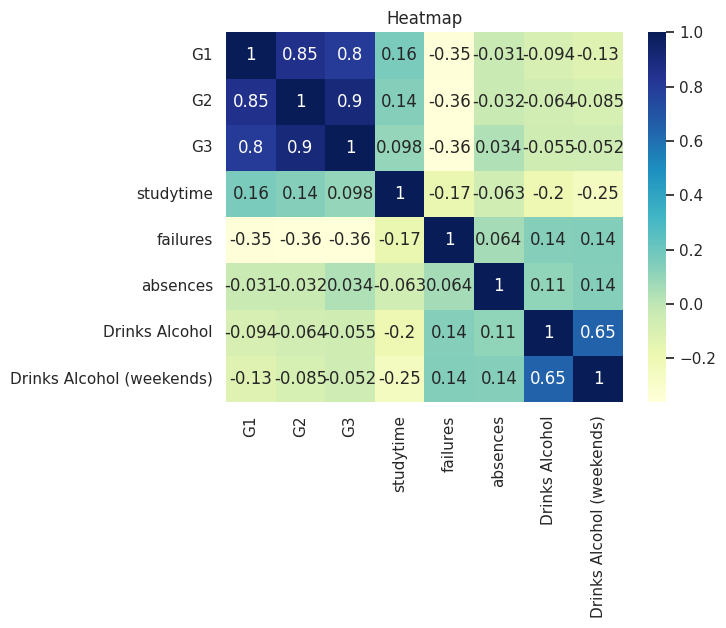

<Figure size 2000x1000 with 0 Axes>

In [35]:
df["Drinks Alcohol"] = df["Dalc"]
df["Drinks Alcohol (weekends)"] = df["Walc"]

plt.title("Heatmap")
corr_cols = ["G1", "G2", "G3", "studytime", "failures", "absences", "Drinks Alcohol", "Drinks Alcohol (weekends)"]
sns.heatmap(df[corr_cols].corr(), annot=True, cmap="YlGnBu")
plt.figure(figsize=(20, 10), dpi=100)
plt.show()